In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset loading

In [2]:
dataset = pd.read_csv('../Y3 - Sample data/Z2 - datasetprepclean.csv', index_col = 0,
                     )
print('dataset shape:', dataset.shape)
dataset.head()

dataset shape: (4534, 281)


,cut_length,num_closed_patterns,num_open_patterns,total_area,minimum_rectangle_area,minimum_rectangle_dim1,minimum_rectangle_dim2,convex_hull_area,no_hole_area,thickness,...,bend_edge_length_std_09,bend_edge_length_min_09,bend_edge_length_max_09,VAMAT,VALAJOUT,VALTOT,VOL_COST_CONVHULL,VOL_COST_RECTANGLE,VOL_COST_MPATTERN,bend_group
COART,,,,,,,,,,,,,,,,,,,,,
L1600360,3178.489502,9,0,285678.093750,431798.46875,722.070984,598.000000,320484.593750,286893.718750,4.0,...,0.0,0.0,0.0,12.51,5.15,17.66,0.000010,0.000007,0.000011,3-5
L1600470,317.114502,1,0,3403.138184,3500.00000,140.000000,25.000000,3403.138184,3403.138184,10.0,...,0.0,0.0,0.0,0.25,0.92,1.17,0.000007,0.000007,0.000007,0
L1600700,625.429871,2,0,10823.929688,12759.00000,255.179993,50.000000,11152.315430,11152.315430,10.0,...,0.0,0.0,0.0,0.75,1.61,2.36,0.000007,0.000006,0.000007,1-2
L1600710,625.429871,2,0,10823.929688,12759.00000,255.179993,50.000000,11152.315430,11152.315430,10.0,...,0.0,0.0,0.0,0.75,1.61,2.36,0.000007,0.000006,0.000007,1-2
L1605790,2535.909668,5,0,184134.328125,355747.34375,826.389404,430.483917,230244.703125,184672.265625,5.0,...,0.0,0.0,0.0,12.24,5.72,17.96,0.000011,0.000007,0.000013,3-5


In [3]:
dataset.columns.values

array(['cut_length', 'num_closed_patterns', 'num_open_patterns',
       'total_area', 'minimum_rectangle_area', 'minimum_rectangle_dim1',
       'minimum_rectangle_dim2', 'convex_hull_area', 'no_hole_area',
       'thickness', 'radius_approx', 'radius_count', 'direction_count',
       'bend_count', 'bend_radius_00', 'bend_angle_00',
       'bend_direction_00', 'deformation_length_00', 'merged_bend_00',
       'punch_length_00', 'bend_radius_01', 'bend_angle_01',
       'bend_direction_01', 'deformation_length_01', 'merged_bend_01',
       'punch_length_01', 'bend_radius_02', 'bend_angle_02',
       'bend_direction_02', 'deformation_length_02', 'merged_bend_02',
       'punch_length_02', 'bend_radius_03', 'bend_angle_03',
       'bend_direction_03', 'deformation_length_03', 'merged_bend_03',
       'punch_length_03', 'bend_radius_04', 'bend_angle_04',
       'bend_direction_04', 'deformation_length_04', 'merged_bend_04',
       'punch_length_04', 'bend_radius_05', 'bend_angle_05',
     

In [4]:
for index, nancount in dataset.isnull().sum().iteritems():
    if nancount != 0:
        print(index, '-->', nancount)
else:
    print('Done !')

deformation_length_00 --> 226
deformation_length_01 --> 101
deformation_length_02 --> 8
deformation_length_03 --> 3
deformation_length_04 --> 1
Done !


In [5]:
#Cleaning of the remaining Nan
dataset = dataset.dropna()
dataset.shape

(4281, 281)

# cleaning to have at least min occurences

In [6]:
minocc = 50
todrop = []
df = dataset['thickness'].reset_index().groupby('thickness').count()
for index, occ in df.iterrows():
    if occ.COART <= minocc:
        todrop.append(index)

for thickness in todrop:
    dataset = dataset[dataset['thickness'] != thickness]
dataset.shape

(4248, 281)

# Dataset re-ordering and Splitting

The baseline will be defined with the 3 core factors:
- Thickness
- Area
- Number of bends

In [7]:
start = dataset.columns.values
todrop = ['bend_group', 'VAMAT', 'VALAJOUT', 'VALTOT', 'radius_approx', 'level_0']

def representsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False
benddetails  = [x for x in dataset.columns.values if representsInt(x[-2:])]
#todrop.extend(benddetails)

todrop.extend([x for x in dataset.columns.values if x.startswith('VOL_')])

tokeep = [x for x in start if x not in todrop ]
tokeep

['cut_length',
 'num_closed_patterns',
 'num_open_patterns',
 'total_area',
 'minimum_rectangle_area',
 'minimum_rectangle_dim1',
 'minimum_rectangle_dim2',
 'convex_hull_area',
 'no_hole_area',
 'thickness',
 'radius_count',
 'direction_count',
 'bend_count',
 'bend_radius_00',
 'bend_angle_00',
 'bend_direction_00',
 'deformation_length_00',
 'merged_bend_00',
 'punch_length_00',
 'bend_radius_01',
 'bend_angle_01',
 'bend_direction_01',
 'deformation_length_01',
 'merged_bend_01',
 'punch_length_01',
 'bend_radius_02',
 'bend_angle_02',
 'bend_direction_02',
 'deformation_length_02',
 'merged_bend_02',
 'punch_length_02',
 'bend_radius_03',
 'bend_angle_03',
 'bend_direction_03',
 'deformation_length_03',
 'merged_bend_03',
 'punch_length_03',
 'bend_radius_04',
 'bend_angle_04',
 'bend_direction_04',
 'deformation_length_04',
 'merged_bend_04',
 'punch_length_04',
 'bend_radius_05',
 'bend_angle_05',
 'bend_direction_05',
 'deformation_length_05',
 'merged_bend_05',
 'punch_length_

In [228]:
#Dataset definition
X = dataset[['thickness', 'minimum_rectangle_area', 'bend_count']]
y = dataset[['VAMAT', 'VALAJOUT', 'VALTOT']]

limitedset = ['thickness', 'minimum_rectangle_area', 'bend_count']


In [229]:
target = 'VALTOT'
assert target in y.columns.values, 'The target must be in y dataset'

In [230]:
y[[target]].describe()

,VALTOT
count,4248.000000
mean,7.574859
std,8.345230
min,0.320000
25%,2.510000
50%,4.480000
75%,9.512500
max,58.400000


In [231]:
# Dataset splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=0 ,stratify=dataset['bend_group'])

# Blocs creation

In [232]:
#Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [233]:
# Metric
from sklearn.metrics import mean_squared_error

In [234]:
#regressions
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0, random_state=0, normalize=False)

from sklearn.linear_model import ElasticNet
enet = ElasticNet(alpha=0, l1_ratio=1, random_state=0, normalize=False)

In [235]:
#Other tools
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# With standardisation - S1

In [236]:
pipe = [('scaler', scaler), ('enet', enet)]
regpip = Pipeline(pipe)

In [237]:
parameters = {'enet__alpha':np.logspace(-3,3,11),
              'enet__l1_ratio':np.linspace(0.01,1,11)
             }
regstd = GridSearchCV(regpip, parameters, cv=5, n_jobs=-2, scoring='neg_mean_squared_error')

In [238]:
regstd.fit(X_train[limitedset], y_train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('enet', ElasticNet(alpha=0, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-2,
       param_grid={'enet__alpha': array([1.00000e-03, 3.98107e-03, 1.58489e-02, 6.30957e-02, 2.51189e-01,
       1.00000e+00, 3.98107e+00, 1.58489e+01, 6.30957e+01, 2.51189e+02,
       1.00000e+03]), 'enet__l1_ratio': array([0.01 , 0.109, 0.208, 0.307, 0.406, 0.505, 0.604, 0.703, 0.802,
       0.901, 1.   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [239]:
regstd.best_params_

{'enet__alpha': 0.001, 'enet__l1_ratio': 0.7030000000000001}

In [240]:
regstd.score(X_train[limitedset], y_train[target])

-12.26370711605148

In [241]:
regstd.score(X_train[limitedset], y_train[target])

-12.26370711605148

In [242]:
mean_squared_error(y_test[target], regstd.predict(X_test[limitedset]))

10.204584362696366

In [243]:
regstd.best_estimator_.named_steps['enet'].coef_

array([2.57613937, 7.463898  , 0.7306415 ])

# No standardisation

In [244]:
parameters = {'alpha':np.logspace(-3,3,11),
              'l1_ratio':np.linspace(0.01,1,11)
             }
regnostd = GridSearchCV(enet, parameters, cv=5, n_jobs=-2, scoring='neg_mean_squared_error')

In [245]:
regnostd.fit(X_train[limitedset], y_train[target])

GridSearchCV(cv=5, error_score='raise',
       estimator=ElasticNet(alpha=0, copy_X=True, fit_intercept=True, l1_ratio=1,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=0, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=-2,
       param_grid={'alpha': array([1.00000e-03, 3.98107e-03, 1.58489e-02, 6.30957e-02, 2.51189e-01,
       1.00000e+00, 3.98107e+00, 1.58489e+01, 6.30957e+01, 2.51189e+02,
       1.00000e+03]), 'l1_ratio': array([0.01 , 0.109, 0.208, 0.307, 0.406, 0.505, 0.604, 0.703, 0.802,
       0.901, 1.   ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [246]:
regnostd.best_params_

{'alpha': 0.001, 'l1_ratio': 0.01}

In [247]:
regnostd.score(X_train[limitedset], y_train[target])

-12.263696025472308

In [248]:
regnostd.score(X_test[limitedset], y_test[target])

-10.208821514868221

In [249]:
mean_squared_error(y_test[target], regnostd.predict(X_test[limitedset]))

10.208821514868221

In [250]:
regnostd.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__alpha', 'estimator__copy_X', 'estimator__fit_intercept', 'estimator__l1_ratio', 'estimator__max_iter', 'estimator__normalize', 'estimator__positive', 'estimator__precompute', 'estimator__random_state', 'estimator__selection', 'estimator__tol', 'estimator__warm_start', 'estimator', 'fit_params', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [251]:
regnostd.best_estimator_.coef_

array([8.93553385e-01, 5.73749829e-05, 5.58563468e-01])

In [252]:
X_test[limitedset][:1].shape

(1, 3)

# Per thickness

In [253]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_X_y

In [254]:
class Regthick(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.thickness = []
    
    def fit(self, X, y):
        #X, y = check_X_y(X, y)
        self.thickness = X['thickness'].unique()
        parameters = {'alpha':np.logspace(-3,3,5),
                      'l1_ratio':np.linspace(0.01,1,5)
                        }
        for thickness in self.thickness:
            setattr(self, 'reg{:02d}'.format(int(thickness)),
                    GridSearchCV(ElasticNet(alpha=0, l1_ratio=1, random_state=0, normalize=False),
                                 parameters, cv=3, n_jobs=-2, scoring='neg_mean_squared_error'))
            
            mask = X['thickness']==thickness
            #print(X.columns.values)
            df = X[mask]
            labels = y[mask]
            getattr(self, 'reg{:02d}'.format(int(thickness))).fit(df, labels)
    
    def predict(self, X, y=None):
        thickness = X[0]
        df = np.array(X).reshape(1, -1)
        #print(thickness)
        #print(getattr(self, 'reg{:02d}'.format(int(thickness))).predict(df))
        return getattr(self, 'reg{:02d}'.format(int(thickness))).predict(df)
    
    def get_th_coefs(self):
        toreturn = []
        for th in self.thickness:
            estim = getattr(self, 'reg{:02d}'.format(int(th)))
            temp = estim.best_estimator_.coef_.copy()
            temp[0] = th
            toreturn.append(temp)
        return np.array(toreturn)
    


In [255]:
regthick = Regthick()
regthick.fit(X_train[limitedset], y_train[target])

In [256]:
regthick.reg10.predict(np.array([10.0, 123061.765625, 2]).reshape(1,-1))

array([14.90583246])

In [257]:
# Coeffs per thickness
data = regthick.get_th_coefs()
coeffs = pd.DataFrame(data, columns=limitedset)
coeffs.set_index('thickness', inplace=True)
coeffs = coeffs.sort_index()
coeffs

,minimum_rectangle_area,bend_count
thickness,,
3.0,0.000031,0.684718
4.0,0.000039,0.354608
5.0,0.000048,0.799825
6.0,0.000056,0.425022
8.0,0.000078,0.518047
10.0,0.000088,1.339565
12.0,0.000111,-0.000000
15.0,0.000132,1.359469


In [258]:
#1.26214574e-05 * 123061.765625 + 6.96330034e-01*2
regthick.get_th_coefs()

array([[ 5.00000000e+00,  4.79857229e-05,  7.99824590e-01],
       [ 4.00000000e+00,  3.91950926e-05,  3.54607535e-01],
       [ 6.00000000e+00,  5.63722816e-05,  4.25022208e-01],
       [ 1.00000000e+01,  8.84848853e-05,  1.33956490e+00],
       [ 1.20000000e+01,  1.11164780e-04, -0.00000000e+00],
       [ 8.00000000e+00,  7.82325232e-05,  5.18046711e-01],
       [ 1.50000000e+01,  1.32241281e-04,  1.35946914e+00],
       [ 3.00000000e+00,  3.06487430e-05,  6.84718499e-01]])

In [259]:
asmset = [[th, rect, bend] for th, rect, bend in zip(X_test.thickness.tolist(),
                                            X_test.minimum_rectangle_area.tolist(),
                                           X_test.bend_count.tolist(),)]

In [260]:
prediction_s2 = [regthick.predict(x)[0] for x in asmset]

# Results comparison

In [261]:
prediction_s2 = np.array([regthick.predict(x)[0] for x in asmset])
prediction_s1 = regstd.predict(X_test[limitedset])

In [262]:
resultset = pd.DataFrame({target: y_test[target],
                          'pred_S1':prediction_s1,
                          'pred_S2':prediction_s2}, index=y_test.index)
resultset.head()

,VALTOT,pred_S1,pred_S2
COART,,,
L3048770,12.19,12.263628,14.905832
L6811140,0.43,-0.214633,0.692045
L3055970,1.26,4.414032,1.839797
L8829170,1.16,0.282919,1.744112
L8825470,6.27,5.902125,6.807104


In [263]:
mean_squared_error(resultset[target], resultset['pred_S1'])

10.204584362696366

In [264]:
mean_squared_error(resultset[target], resultset['pred_S2'])

3.0341435302088757

In [265]:
resultset['RMSE_s1'] = (resultset[target]-resultset['pred_S1'])**2
resultset['RMSE_s2'] = (resultset[target]-resultset['pred_S2'])**2
resultset.head()

,VALTOT,pred_S1,pred_S2,RMSE_s1,RMSE_s2
COART,,,,,
L3048770,12.19,12.263628,14.905832,0.005421,7.375746
L6811140,0.43,-0.214633,0.692045,0.415551,0.068668
L3055970,1.26,4.414032,1.839797,9.947918,0.336164
L8829170,1.16,0.282919,1.744112,0.769271,0.341186
L8825470,6.27,5.902125,6.807104,0.135332,0.288481


In [266]:
#
comparisonset = pd.merge(resultset.reset_index(), X_test.reset_index(), on='COART', how='inner')
comparisonset.head()

,COART,VALTOT,pred_S1,pred_S2,RMSE_s1,RMSE_s2,thickness,minimum_rectangle_area,bend_count
0,L3048770,12.19,12.263628,14.905832,0.005421,7.375746,10.0,123061.765625,2
1,L6811140,0.43,-0.214633,0.692045,0.415551,0.068668,5.0,2829.027832,0
2,L3055970,1.26,4.414032,1.839797,9.947918,0.336164,10.0,5675.547363,0
3,L8829170,1.16,0.282919,1.744112,0.769271,0.341186,4.0,7594.832031,2
4,L8825470,6.27,5.902125,6.807104,0.135332,0.288481,5.0,80260.085938,3


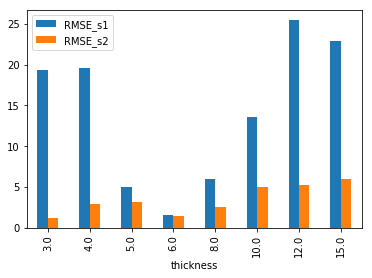

In [267]:
# Is the error sourced by thickness ?
df = comparisonset[['RMSE_s1', 'RMSE_s2', 'thickness']].groupby('thickness').mean()
df.plot.bar()
plt.show()


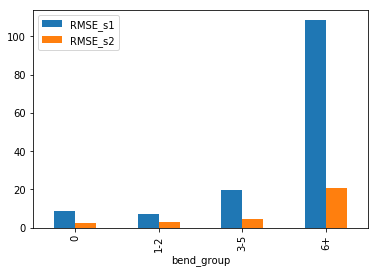

In [268]:
# Is the error sourced by number of errors ?

# Is the error sourced by number of errors ?
def bendgroupcalc(entry):
    if entry == 0:
        return '0'
    elif entry <= 2:
        return '1-2'
    elif entry <= 5:
        return '3-5'
    else:
        return '6+'
    return 'None'

comparisonset['bend_group'] = comparisonset['bend_count'].apply(bendgroupcalc)

df = comparisonset[['RMSE_s1', 'RMSE_s2', 'bend_group']].groupby('bend_group').mean()
df.plot.bar()
plt.show()


In [269]:
comparisonset['percent_error_s1'] = ((comparisonset[target] / comparisonset['RMSE_s1'])-1)*100
comparisonset['percent_error_s2'] = ((comparisonset[target] / comparisonset['RMSE_s2'])-1)*100
comparisonset[[target, 'pred_S1', 'percent_error_s1', 'pred_S1', 'percent_error_s2']].head()

,VALTOT,pred_S1,percent_error_s1,pred_S1,percent_error_s2
0,12.19,12.263628,224761.506941,12.263628,65.271419
1,0.43,-0.214633,3.477005,-0.214633,526.204980
2,1.26,4.414032,-87.334033,4.414032,274.816950
3,1.16,0.282919,50.792209,0.282919,239.990058
4,6.27,5.902125,4533.046131,5.902125,2073.454584


In [270]:
df = comparisonset[['RMSE_s2', 'percent_error_s2', 'thickness', 'bend_group', 'COART']].groupby(['thickness', 'bend_group'])#.mean()
df.agg({'RMSE_s2': ['mean', 'max'], 'percent_error_s2': ['mean', 'max'],'COART':['count'] })

RMSE_s2             percent_error_s2                \
                            mean         max             mean           max   
thickness bend_group                                                          
3.0       0             0.220228    0.899920     1.496548e+04  9.883450e+04   
          1-2           0.321247    1.412358     1.855950e+05  1.395779e+06   
          3-5           2.035539    8.749212     1.466856e+04  1.122586e+05   
          6+            5.103395    9.639196     2.125666e+02  3.276905e+02   
4.0       0             1.505230   18.431369     1.330870e+03  1.598412e+04   
          1-2           1.200840   43.968747     1.478378e+09  1.951323e+11   
          3-5           6.846490   64.738538     6.437224e+03  1.983655e+05   
          6+          125.632774  125.632774    -6.438031e+01 -6.438031e+01   
5.0       0             0.987081   13.186863     5.585576e+04  3.017995e+06   
          1-2           2.560822   47.163384     1.439384e+06  1.317733e+08   
          3-5           5.487447   63.004602     5.494421e+03  7.371878e+04   
          6+           32.738845   73.448845     7.283261e+03  2.870157e+04   
6.0       0             2.004738   94.234356     5.929007e+05  7.016877e+07   
          1-2           0.712189   41.058525     2.182010e+05  2.942844e+07   
          3-5           2.601168   28.274413     2.280218e+04  4.497103e+05   
          6+            3.123557   11.274450     1.614315e+03  4.576435e+03   
8.0       0             2.274668  118.418017     2.977559e+06  3.885170e+08   
          1-2           2.870027  107.411616     1.606371e+06  1.867666e+08   
          3-5           2.750087   18.238285     6.047648e+03  3.258988e+04   
          6+            0.797302    0.797302     1.367448e+03  1.367448e+03   
10.0      0             1.095623   29.655936     1.495949e+05  1.171770e+07   
          1-2          10.651507  227.600386     6.113503e+04  2.173616e+06   
          3-5           3.825185   11.749303     6.213983e+03  3.550814e+04   
12.0      0             5.482160  193.417241     2.118480e+05  1.265045e+07   
          1-2           4.765696   30.780524     1.585596e+07  3.645931e+08   
          3-5           1.590524    1.590524     4.017214e+02  4.017214e+02   
15.0      0             5.233799   94.518919     6.435626e+04  2.715361e+06   
          1-2           7.356682   15.412080     4.735825e+02  2.626666e+03   
          3-5          10.949151   19.971367     4.752058e+02  1.238128e+03   

                     COART  
                     count  
thickness bend_group        
3.0       0             10  
          1-2           12  
          3-5           10  
          6+             3  
4.0       0             43  
          1-2          132  
          3-5           43  
          6+             1  
5.0       0             60  
          1-2          105  
          3-5           34  
          6+             4  
6.0       0            132  
          1-2          153  
          3-5           27  
          6+             5  
8.0       0            146  
          1-2          135  
          3-5           25  
          6+             1  
10.0      0             93  
          1-2           64  
          3-5            9  
12.0      0             72  
          1-2           23  
          3-5            1  
15.0      0             46  
          1-2            9  
          3-5            4

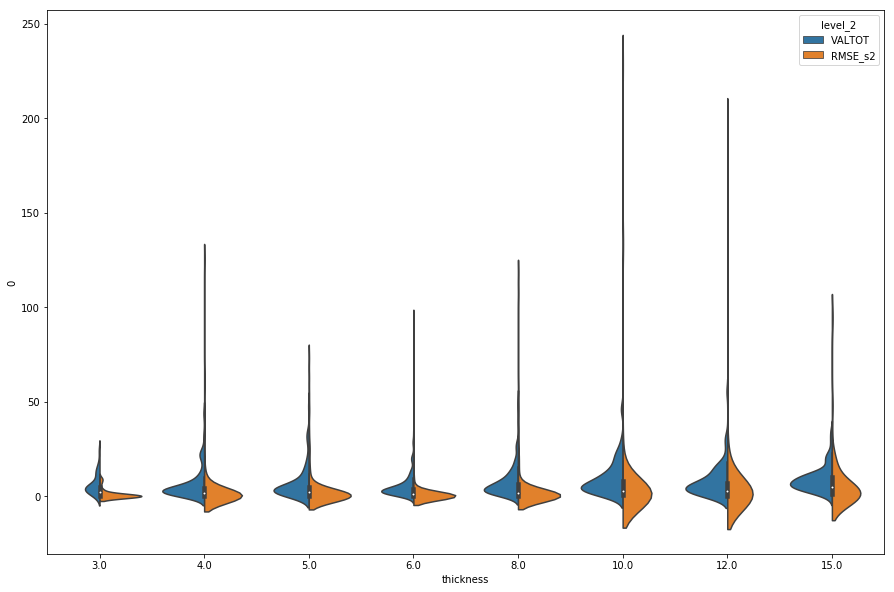

In [272]:
df=comparisonset[[target, 'RMSE_s2', 'COART', 'thickness']]
#df=df[df['thickness']!=15]
df.set_index(['COART', 'thickness'], inplace=True)
df = df.stack().reset_index()
fig, ax = plt.subplots(figsize=(15,10))
#ax.set_ylim(-10, 40)
sns.violinplot(x="thickness", y=0, data=df, split=True, hue='level_2', ax=ax)

plt.show()

In [273]:
df = comparisonset[['RMSE_s2', 'COART', 'thickness']]
df.set_index('COART', inplace=True)
worst = df.groupby('thickness')['RMSE_s2'].nlargest(3)
worst
#worst.to_csv('worst_s0.csv')

thickness  COART   
3.0        L8033291      9.639196
           L6705510      8.749212
           L7078280      6.855222
4.0        L8038520    125.632774
           L8807311     64.738538
           L8034860     57.534039
5.0        L7065870     73.448845
           L7065850     63.004602
           L8819680     54.432785
6.0        L8414620     94.234356
           L6005820     59.582103
           L8035810     41.058525
8.0        L2607610    118.418017
           L2607600    107.411616
           L7080610     57.122343
10.0       L3027651    227.600386
           L3063340    134.607433
           L3063330    132.757506
12.0       L3063370    193.417241
           L6816400     78.701783
           L3047420     30.780524
15.0       L2512080     94.518919
           L2522010     47.965780
           L7057720     20.895763
Name: RMSE_s2, dtype: float64